In [1]:
!pip install pandas 
!pip install pycaret[full]

In [ ]:
# !mlflow ui

In [2]:
!sudo apt-get install unzip 
!sudo apt-get install libgomp1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  zip
The following NEW packages will be installed:
  unzip
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 168 kB of archives.
After this operation, 593 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 unzip amd64 6.0-25ubuntu1.1 [168 kB]
Fetched 168 kB in 1s (114 kB/s) 
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package unzip.
(Reading database ... 14988 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-25ubuntu1.1_amd64.deb ...
Unpacking unzip (6.0-25ubuntu1.1) ...
Setting up unzip (6.0-25ubuntu1.1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:

In [3]:
!sudo apt-get install zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  zip
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 167 kB of archives.
After this operation, 638 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 zip amd64 3.0-11build1 [167 kB]
Fetched 167 kB in 1s (115 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package zip.
(Reading database ... 15009 files and directories currently installed.)
Preparing to unpack .../zip_3.0-11build1_amd64.deb ...
Unpacking zip (3.0-11build1) ...
Setting up zip (3.0-11build1) ...


In [ ]:
!zip -r mlflow.zip ./mlruns

In [7]:
!unzip -q train.zip

In [5]:
!pip uninstall -y lightgbm
!pip install lightgbm==2.2.3 -i https://pypi.tuna.tsinghua.edu.cn/simple

Found existing installation: lightgbm 3.3.5
Uninstalling lightgbm-3.3.5:
  Successfully uninstalled lightgbm-3.3.5
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 1.2 MB 498 kB/s eta 0:00:01
ERROR: pycaret 3.0.2 has requirement lightgbm>=3.0.0, but you'll have lightgbm 2.2.3 which is incompatible.


In [21]:
!pip install skops

ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt


In [8]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import mlflow

dtypes = {
        'MachineIdentifier':                                    'str',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int32',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float32',
        'LocaleEnglishNameIdentifier':                          'int32',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float32',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int32',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int32',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float32',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float32',
        'HasDetections':                                        'int8'
    }

malware = pd.read_csv('train.csv',dtype=dtypes)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


In [9]:
categorical_columns = [
    'ProductName',
    'EngineVersion',
    'AppVersion',
    'AvSigVersion',
    'Platform',
    'Processor',
    'OsVer',
    'OsPlatformSubRelease',
    'OsBuildLab',
    'SkuEdition',
    'PuaMode',
    'SmartScreen',
    'Census_MDC2FormFactor',
    'Census_DeviceFamily',
    'Census_ProcessorClass',
    'Census_PrimaryDiskTypeName',
    'Census_ChassisTypeName',
    'Census_PowerPlatformRoleName',
    'Census_InternalBatteryType',
    'Census_OSVersion',
    'Census_OSArchitecture',
    'Census_OSBranch',
    'Census_OSEdition',
    'Census_OSSkuName',
    'Census_OSInstallTypeName',
    'Census_OSWUAutoUpdateOptionsName',
    'Census_GenuineStateName',
    'Census_ActivationChannel',
    'Census_FlightRing'
]

from category_encoders.hashing import HashingEncoder

he = HashingEncoder(cols=categorical_columns).fit(malware.iloc[:, :-1], malware.iloc[:, -1])

data = he.transform(malware.iloc[:, :-1])



In [10]:
malware = pd.concat([data, malware.iloc[:, -1]], axis=1)

In [11]:
from pycaret.classification import *
clf1 = setup(data = malware, 
             target = 'HasDetections',
             ignore_features=['MachineIdentifier','PuaMode','Census_ProcessorClass','DefaultBrowsersIdentifier','Census_IsFlightingInternal','Census_InternalBatteryType'],
             remove_multicollinearity=True, 
             multicollinearity_threshold=0.8 ,
             feature_selection=True,
             use_gpu=True,
             n_features_to_select=39,
             normalize = True,
             low_variance_threshold = 0.1, 
             fold_strategy=skf,
             log_experiment = True, 
             log_plots = True, 
             log_data = True,
             memory=False)

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] Unknown device 

,Description,Value
0,Session id,5800
1,Target,HasDetections
2,Target type,Binary
3,Original data shape,"(8921483, 62)"
4,Transformed data shape,"(8921483, 40)"
5,Transformed train set shape,"(6245038, 40)"
6,Transformed test set shape,"(2676445, 40)"
7,Ignore features,6
8,Numeric features,58
9,Rows with missing values,99.9%


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] Unknown device type cuda
[LightGBM] [Fatal] Unknown device type cuda
2023/06/11 10:37:05 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


In [14]:
best = compare_models(include = ['catboost', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6322,0.6850,0.6642,0.6241,0.6435,0.2645,0.2650,126.4460
lightgbm,Light Gradient Boosting Machine,0.6241,0.6740,0.6603,0.6155,0.6371,0.2482,0.2488,209.7060
catboost,CatBoost Classifier,0.6213,0.6701,0.6652,0.6113,0.6371,0.2426,0.2436,150.2920


In [15]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

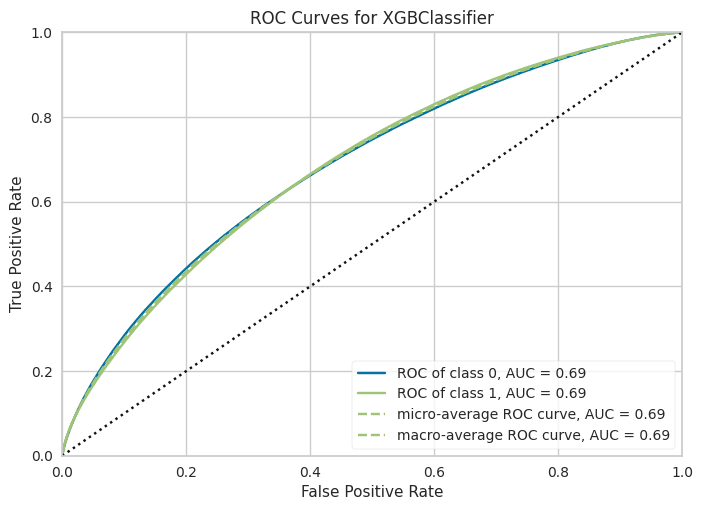

In [17]:
plot_model(best, plot = 'auc')

In [ ]:
from skopt import BayesSearchCV

# bayes = BayesSearchCV(estimator= best, search_spaces= )

tuned_dt = tune_model(best, n_iter = 60,optimize = 'auc', search_library = 'scikit-optimize' ,choose_better = True, search_algorithm = 'bayesian')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:45:47
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
!pip install hyperopt tune-sklearn ray[tune]

In [ ]:
tuned_dt = tune_model(best, n_iter = 60,optimize = 'auc', search_library = 'tune-sklearn', search_algorithm = 'hyperopt',choose_better = True)

In [ ]:
best = ensemble_model(best, n_estimators = 60,choose_better = True)

In [ ]:
best = ensemble_model(best, n_estimators = 60, method = 'Boosting',choose_better = True)